### Conhecendo dados

#### Leitura dos dados

In [17]:
pip install openpyxl --upgrade 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd

In [19]:
emissoes_gases = pd.read_excel('/home/ike/develop/cursos/alura/DataScience/Python/selecao_dados/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx', sheet_name = 'GEE Estados')

/home/ike/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [20]:
# Explorando os dados
emissoes_gases.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


In [21]:
emissoes_gases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

#### Ajustando Dados

In [22]:
# Removando informações que não são dos dados nacionias de emissão 
emissoes_gases['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

In [23]:
# Selecionando apenas os registros com Remoção e Remomoção NCI 
(emissoes_gases['Emissão / Remoção / Bunker'] == 'Remoção NCI') | (emissoes_gases['Emissão / Remoção / Bunker'] == 'Remoção')

0         False
1         False
2         False
3         False
4         False
          ...  
103307    False
103308    False
103309    False
103310    False
103311    False
Name: Emissão / Remoção / Bunker, Length: 103312, dtype: bool

In [24]:
emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção'])]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RO,PEC,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AC,PEC,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AM,PEC,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RR,PEC,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),PA,PEC,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR4,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR6,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [25]:
# Checar apenas valores são segativos
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']),1970:2021]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [26]:
# Checar o se todos são negativos, por meio da função max()
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']),1970:2021].max()

1970    0.0
1971    0.0
1972    0.0
1973    0.0
1974    0.0
1975    0.0
1976    0.0
1977    0.0
1978    0.0
1979    0.0
1980    0.0
1981    0.0
1982    0.0
1983    0.0
1984    0.0
1985    0.0
1986    0.0
1987    0.0
1988    0.0
1989    0.0
1990    0.0
1991    0.0
1992    0.0
1993    0.0
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2021    0.0
dtype: float64

In [27]:
# Verificando se a é identidificado algum valor de emissãoo do tipo Bunker na coluna Estado 
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'] == "Bunker", 'Estado'].unique()

array([nan], dtype=object)

In [28]:
# Selecionando Apenas as Emissoes para prosseguir com o projeto
emissoes_gases = emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'] == 'Emissão']
emissoes_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,MS,AGROPEC,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MT,AGROPEC,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MS,AGROPEC,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,N2O (t),MT,AGROPEC,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


In [29]:
# Como não há mais nenhum valor útil da coluna Emissão / Remoção / Banker, vamos remove-la
emissoes_gases = emissoes_gases.drop(columns = 'Emissão / Remoção / Bunker')
emissoes_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


### Agrupando dados


#### Remodelando o df

In [14]:
emissoes_gases.loc[:,'Nível 1 - Setor':'Produto'].columns

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Gás', 'Estado', 'Atividade Econômica', 'Produto'],
      dtype='object')

In [15]:
colunas_info = list(emissoes_gases.loc[:,'Nível 1 - Setor':'Produto'].columns)

In [16]:
emissoes_gases.loc[:,1970:2021].columns

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021],
      dtype='object')

In [17]:
colunas_emissao = list(emissoes_gases.loc[:,1970:2021].columns)

* Transformação com método melt()


In [18]:
emissoes_gases.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano', value_name = 'Emissão')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


In [19]:
emissoes_por_ano = emissoes_gases.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano', value_name = 'Emissão')

##### Agrupando os gases

In [20]:
emissoes_gases.groupby('Gás').groups

{'C2F6 (t)': [410, 411, 412, 425, 426, 427], 'CF4 (t)': [407, 408, 409, 422, 423, 424], 'CH4 (t)': [19, 50, 57, 64, 67, 71, 76, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 447, 448, 449, 450, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1623, 1624, 1625, ...], 'CO (t)': [2, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 443, 444, 445, 446, 7104, 7105, 7106, 7107, 7108, 7109, 7110, 7111, 7112, 7113, 7114, 7115, 7116, 7117, 7118, 7119, 7120, 7121, 7122, 7123, 7124, 7125, 7126, 7127, 7128, 

In [21]:
emissoes_gases.groupby('Gás').get_group('CO2 (t)')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
18,Processos Industriais,Indústria Química,Produção de Acrilonitrila,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,...,21971.482500,21971.482500,21971.482500,21971.482500,21971.482500,21971.482500,21971.482500,21971.482500,21971.482500,21971.482500
23,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),RJ,OUTRA_IND,NaN,...,6378.000654,6546.570237,7202.361331,7202.361331,7202.361331,7202.361331,7202.361331,7202.361331,7202.361331,7202.361331
26,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),MG,OUTRA_IND,NaN,...,11072.917803,11365.573328,12504.099533,12504.099533,12504.099533,12504.099533,12504.099533,12504.099533,12504.099533,12504.099533
29,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,...,548109.431238,562595.879717,618952.926902,618952.926902,618952.926902,618952.926902,618952.926902,618952.926902,618952.926902,618952.926902
32,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),SE,OUTRA_IND,NaN,...,505201.874752,518554.283073,570499.541210,570499.541210,570499.541210,570499.541210,570499.541210,570499.541210,570499.541210,570499.541210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95607,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Outras Mudanças de uso da terra,Uso agropecuário -- Uso agropecuário,CO2 (t),MS,AGROPEC,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
95624,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MT,AGROPEC,NaN,...,502.000000,809.000000,299.000000,172.000000,645.000000,1285.000000,609.000000,292.000000,285.000000,374.000000
95625,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MS,AGROPEC,NaN,...,11637.000000,25785.000000,22531.000000,11927.000000,10355.000000,4642.000000,10866.000000,13273.000000,6766.000000,8613.000000
95642,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Vegetação não florestal se...,CO2 (t),MT,AGROPEC,NaN,...,881.000000,2052.000000,998.000000,249.000000,111.000000,1041.000000,1459.000000,433.000000,574.000000,934.000000


In [22]:
emissoes_por_ano.groupby('Gás').sum(numeric_only = True)

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),7.949268e+08
CO (t),5.111531e+08
CO2 (t),5.324636e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2e (t) GTP-AR6,6.247859e+10


In [23]:
# Outra forma de fazer
emissoes_por_ano.groupby('Gás')[['Emissão']].sum(numeric_only = True)

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),7.949268e+08
CO (t),5.111531e+08
CO2 (t),5.324636e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2e (t) GTP-AR6,6.247859e+10


In [24]:
# Ordenando do maior pro menor
emissoes_por_gas = emissoes_por_ano.groupby('Gás')[['Emissão']].sum(numeric_only = True).sort_values('Emissão', ascending = False)
emissoes_por_gas

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


<Axes: ylabel='Gás'>

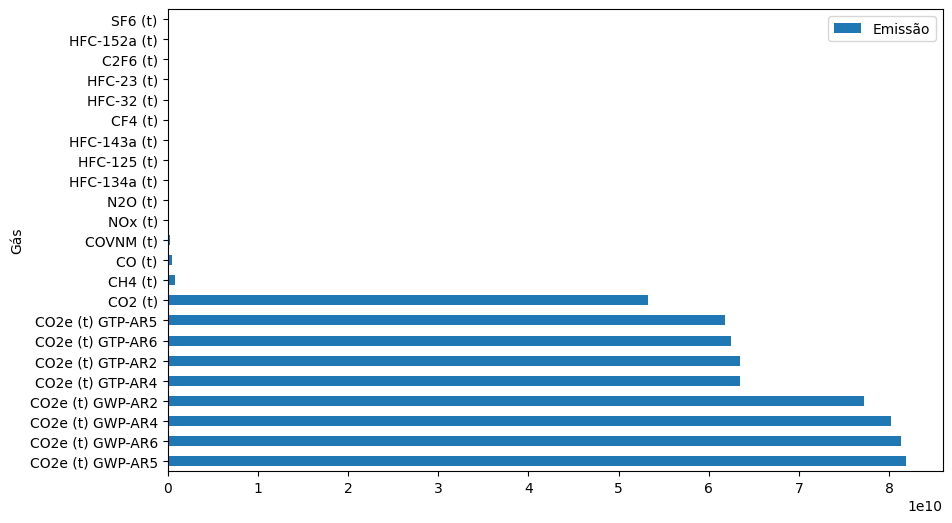

In [25]:
# Plotando um gráfico para discernir/mensurar os valores da tabela emissoes_gases
emissoes_por_gas.plot(kind='barh', figsize=(10,6))

In [26]:
# Identificar a proporção de emissoe de CO2 em comparação aos outros gases presentes na tabela
emissoes_por_gas.iloc[0:9]

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


In [27]:
print(f'A Emissão de CO2 corresponde a {float((emissoes_por_gas.iloc[0:9].sum()/emissoes_por_gas.sum()).iloc[0])*100:.2f} % de emissão total de gases estufa no Brasil de 1970 a 2021.')

A Emissão de CO2 corresponde a 99.74 % de emissão total de gases estufa no Brasil de 1970 a 2021.


#### Agrupamentos Multi-index

##### Agrupando gases por setor

<!-- Identificar a proporção de CO2 em comparação com os demias -->

* Emissão de gases por setor

In [29]:
gas_por_setor = emissoes_por_ano.groupby(['Gás', 'Nível 1 - Setor'])[['Emissão']].sum()
gas_por_setor

Emissão
Gás      Nível 1 - Setor                                 
C2F6 (t) Processos Industriais               5.765018e+02
CF4 (t)  Processos Industriais               7.135481e+03
CH4 (t)  Agropecuária                        5.928481e+08
         Energia                             3.429034e+07
         Mudança de Uso da Terra e Floresta  8.662166e+07
...                                                   ...
N2O (t)  Resíduos                            2.764127e+05
NOx (t)  Agropecuária                        2.602719e+06
         Energia                             9.361215e+07
         Processos Industriais               3.546360e+06
SF6 (t)  Processos Industriais               4.705800e+02

[72 rows x 1 columns]

In [31]:
gas_por_setor.xs('CO2 (t)', level = 0)

,Emissão
Nível 1 - Setor,
Agropecuária,5.411750e+08
Energia,1.261352e+10
Mudança de Uso da Terra e Floresta,3.733930e+10
Processos Industriais,2.729603e+09
Resíduos,2.276264e+07


In [32]:
gas_por_setor.xs(('CO2 (t)', 'Mudança de Uso da Terra e Floresta'),level= [0,1])

,,Emissão
Gás,Nível 1 - Setor,
CO2 (t),Mudança de Uso da Terra e Floresta,3.733930e+10


In [36]:
gas_por_setor.xs('CO2 (t)', level = 0).max()

Emissão    3.733930e+10
dtype: float64

In [35]:
gas_por_setor.xs('CO2 (t)', level = 0).idxmax()

Emissão    Mudança de Uso da Terra e Floresta
dtype: object

In [40]:
gas_por_setor.xs('Agropecuária', level = 1)

,Emissão
Gás,
CH4 (t),5.928481e+08
CO (t),7.132479e+07
CO2 (t),5.411750e+08
CO2e (t) GTP-AR2,8.297112e+09
CO2e (t) GTP-AR4,8.297112e+09
CO2e (t) GTP-AR5,7.065371e+09
CO2e (t) GTP-AR6,7.462618e+09
CO2e (t) GWP-AR2,1.849256e+10
CO2e (t) GWP-AR4,2.065099e+10


* Emissão maxima de gases para todos os setores

In [41]:
gas_por_setor.groupby(level = 0).idxmax()


,Emissão
Gás,
C2F6 (t),"(C2F6 (t), Processos Industriais)"
CF4 (t),"(CF4 (t), Processos Industriais)"
CH4 (t),"(CH4 (t), Agropecuária)"
CO (t),"(CO (t), Energia)"
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)"
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F..."


In [42]:
gas_por_setor.groupby(level = 0).max()

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),5.928481e+08
CO (t),3.959769e+08
CO2 (t),3.733930e+10
CO2e (t) GTP-AR2,3.850044e+10
CO2e (t) GTP-AR4,3.850044e+10
CO2e (t) GTP-AR5,3.831675e+10
CO2e (t) GTP-AR6,3.843359e+10


In [43]:
valores_max = gas_por_setor.groupby(level = 0).max().values

In [54]:
tabela_sumarizada = gas_por_setor.groupby(level = 0).idxmax()
tabela_sumarizada.insert(1, 'Quantidade de emissão',valores_max)
tabela_sumarizada


,Emissão,Quantidade de emissão
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08
CO (t),"(CO (t), Energia)",3.959769e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",3.733930e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",3.831675e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",3.843359e+10


* Na célula seguinte, vamos usar a função swaplevel(), que nos permite inverter um nível de índice com outro. Escrevemos gas_por_setor.swaplevel() passando qual level desejamos trocar com outro, então basta colocarmos 0,1.



In [55]:
gas_por_setor.swaplevel(0, 1)

Emissão
Nível 1 - Setor                    Gás                   
Processos Industriais              C2F6 (t)  5.765018e+02
                                   CF4 (t)   7.135481e+03
Agropecuária                       CH4 (t)   5.928481e+08
Energia                            CH4 (t)   3.429034e+07
Mudança de Uso da Terra e Floresta CH4 (t)   8.662166e+07
...                                                   ...
Resíduos                           N2O (t)   2.764127e+05
Agropecuária                       NOx (t)   2.602719e+06
Energia                            NOx (t)   9.361215e+07
Processos Industriais              NOx (t)   3.546360e+06
                                   SF6 (t)   4.705800e+02

[72 rows x 1 columns]

In [58]:
gas_por_setor.swaplevel(0,1).groupby(level = 0).idxmax()

,Emissão
Nível 1 - Setor,
Agropecuária,"(Agropecuária, CO2e (t) GWP-AR5)"
Energia,"(Energia, CO2e (t) GWP-AR6)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
Processos Industriais,"(Processos Industriais, CO2e (t) GWP-AR6)"
Resíduos,"(Resíduos , CO2e (t) GWP-AR5)"


##### Variação da emissão ao longo dos anos